## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

## Importing Dataset

In [2]:
df = pd.read_csv('../car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.shape

(1000, 5)

## Exploratory Data Analysis

### Univariate Analysis

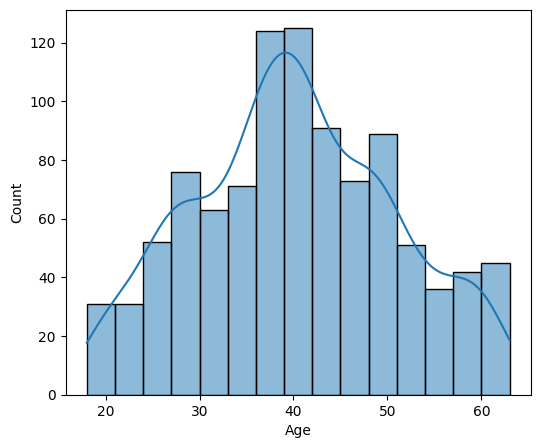

In [4]:
fig = plt.figure(figsize = (6, 5))
sns.histplot(data = df, x = 'Age', kde = True)
plt.show()

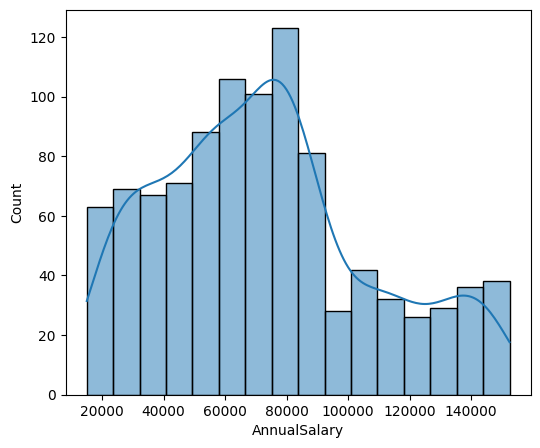

In [5]:
fig = plt.figure(figsize = (6, 5))
sns.histplot(data = df, x = 'AnnualSalary', kde = True)
plt.show()

### Bivariate Analysis

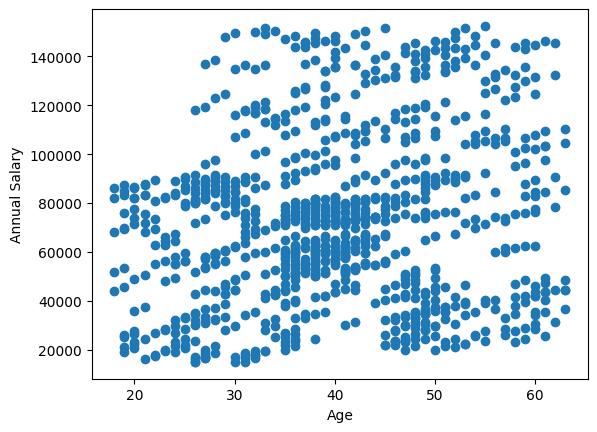

In [6]:
#age vs annualSalary
plt.scatter(data = df, x = 'Age', y = 'AnnualSalary')
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.show()

### Descriptive Analysis

In [7]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


## Data Preprocessing

### Handling Missing Values

In [8]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

### Detecting Outliers

<Axes: ylabel='AnnualSalary'>

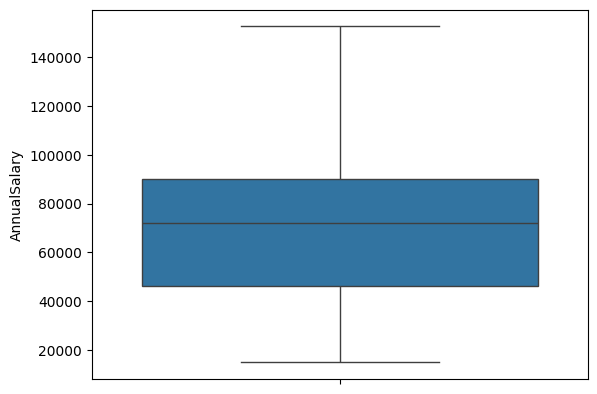

In [9]:
sns.boxplot(data = df['AnnualSalary'])

<Axes: ylabel='Age'>

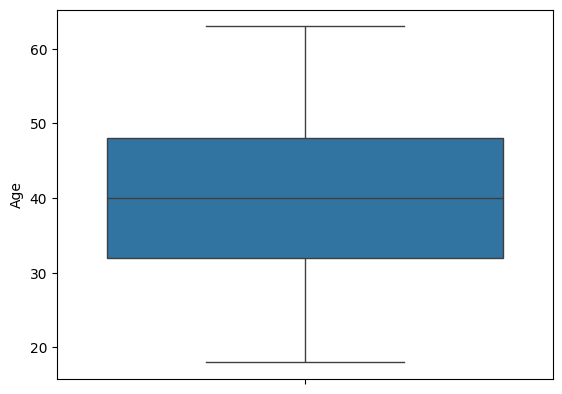

In [10]:
sns.boxplot(data = df['Age'])

### Extracting Values

In [11]:
X = df[['Gender', 'Age', 'AnnualSalary']].values
y = df['Purchased'].values

### Label Encoding Categorical Variables

In [13]:
from sklearn import preprocessing

le_Sex = preprocessing.LabelEncoder()
le_Sex.fit(['Female', 'Male'])
X[:,0] = le_Sex.transform(X[:,0])

### Splitting in Train and Test Data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train Data Size: ', X_train.shape)
print('Test Data Size: ', X_test.shape)

Train Data Size:  (800, 3)
Test Data Size:  (200, 3)


## Model Building

### Decision Tree Classifier

In [15]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import cross_val_score

In [16]:
#building the model

model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 10, splitter = 'best')
model1

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=10)

In [17]:
from sklearn.model_selection import GridSearchCV
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters and their possible values to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set with the best hyperparameters
best_dt_classifier = grid_search.best_estimator_
accuracy = best_dt_classifier.score(X_test, y_test)
print(f"Test Accuracy with Best Hyperparameters: {accuracy:.2f}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Test Accuracy with Best Hyperparameters: 0.86


c:\Users\saxam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
202 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\saxam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\saxam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\saxam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

In [18]:
# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model1, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate and print the average accuracy across all folds
print("Average accuracy: {:.2f}".format(cross_val_scores.mean()))

Cross-validation scores: [0.88 0.83 0.83 0.84 0.91 0.92 0.89 0.88 0.88 0.88]
Average accuracy: 0.87


In [19]:
#fitting the model

model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=10)

In [20]:
#predicting for both train and test sets
model1pred_train = model1.predict(X_train)
model1pred_test = model1.predict(X_test)

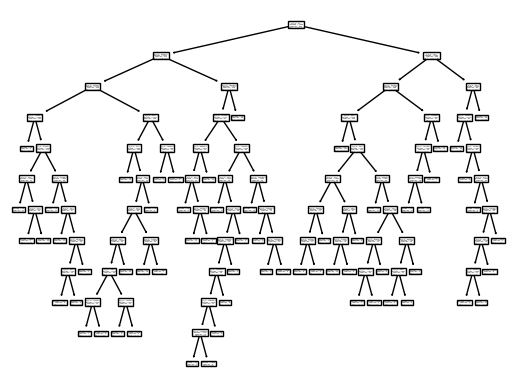

In [21]:
#visualizing the decision tree

tree.plot_tree(model1)
plt.show()

In [22]:
# Model Evaluation
# Accuracy Score

print("DecisionTrees's Accuracy: ", accuracy_score(y_test, model1pred_test))

DecisionTrees's Accuracy:  0.89


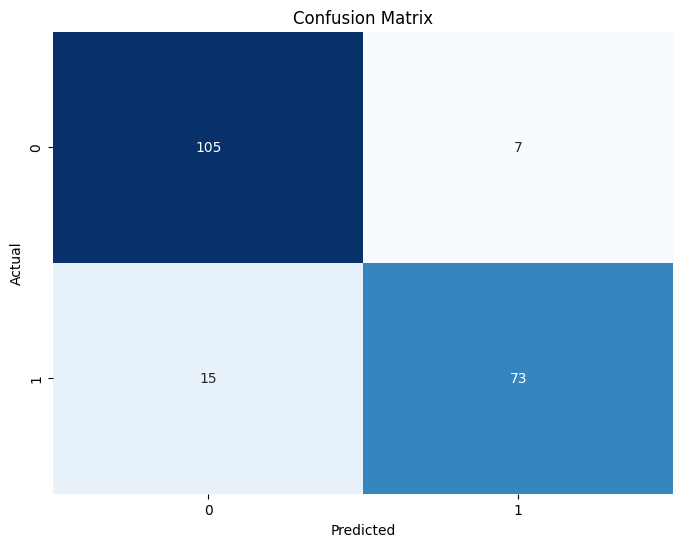

In [23]:
#Confusion Matrix
cm = confusion_matrix(y_test, model1pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
#Classification Report

report1 = classification_report(y_train, model1pred_train)

print("Train Set Classification Report:")
print(report1)

report2 = classification_report(y_test, model1pred_test)

print("Test Set Classification Report:")
print(report2)

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       486
           1       0.93      0.93      0.93       314

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       112
           1       0.91      0.83      0.87        88

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.89       200
weighted avg       0.89      0.89      0.89       200



### SVC Classifier

In [25]:
#importing libraries
from sklearn.svm import SVC

In [26]:
#building the model

model2 = SVC(kernel = 'linear', random_state = 42)
model2.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [27]:
#predicting values for both train and test sets

y_test_pred = model2.predict(X_test)
y_train_pred = model2.predict(X_train)

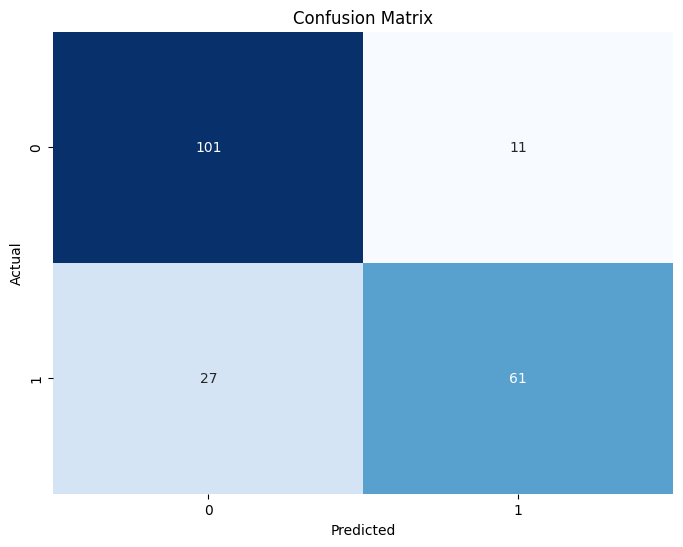

In [28]:
#Model Evaluation
#Confusion Matrix
#Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
#finding out classification report for both train and test sets

report1 = classification_report(y_train, y_train_pred)

print("Train Set Classification Report:")
print(report1)

report2 = classification_report(y_test, y_test_pred)

print("Test Set Classification Report:")
print(report2)

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       486
           1       0.80      0.78      0.79       314

    accuracy                           0.84       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.84      0.84      0.84       800

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       112
           1       0.85      0.69      0.76        88

    accuracy                           0.81       200
   macro avg       0.82      0.80      0.80       200
weighted avg       0.81      0.81      0.81       200



## Saving the Model

In [30]:
#libraries
import pickle

In [31]:
#dumping model
pickle.dump(model1, open('../models/dt_model.pkl', 'wb'))

# End of Notebook